<a href="https://colab.research.google.com/github/ashlvy/Book-Recommender-System/blob/main/Book_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity


In [25]:
import opendatasets as od


books = pd.read_csv('/Books.csv')

# Load the Users dataset
users = pd.read_csv('/Users.csv')

# Load the Ratings dataset
ratings = pd.read_csv('/Ratings.csv')
# Display the first few rows of each dataset to verify they are loaded
print("Books Data:\n", books.head())
print("\nUsers Data:\n", users.head())
print("\nRatings Data:\n", ratings.head())

Books Data:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                 2002     Oxford University Press   
1  Richard Bruce Wright                 2001       HarperFlamingo Canada   
2          Carlo D'Este                 1991             HarperPerennial   
3      Gina Bari Kolata                 1999        Farrar Straus Giroux   
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http:/

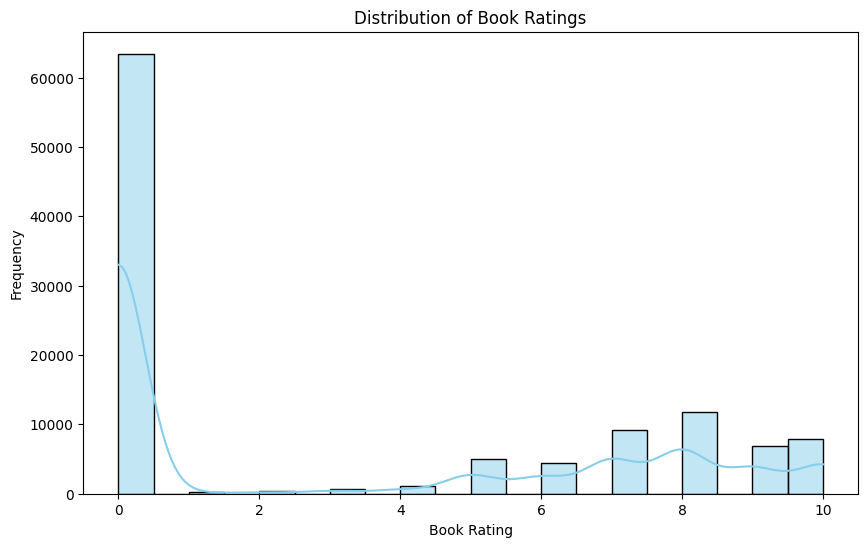

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot the distribution of ratings
plt.figure(figsize=(10,6))
sns.histplot(ratings['Book-Rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Book Ratings")
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.show()


<ipython-input-27-1ec13b14e98a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_books.index, y=top_books.values, palette="viridis")


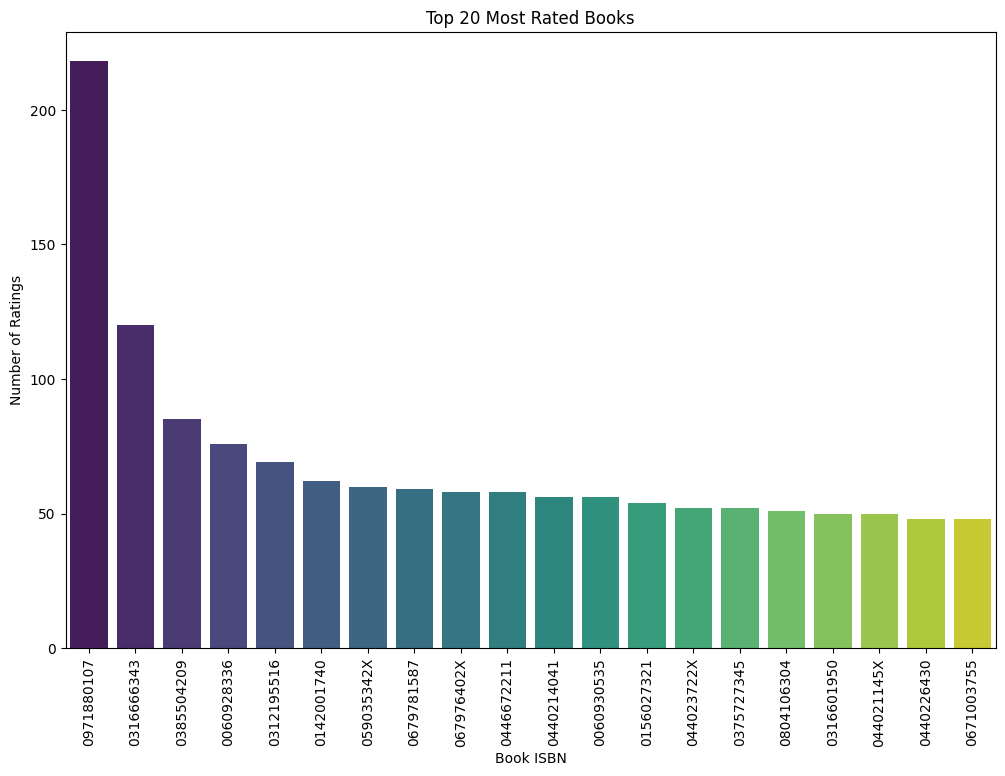

In [27]:
# count the number of ratings per book
rating_counts = ratings['ISBN'].value_counts()

# plot the top 20 books with the most ratings
top_books = rating_counts.head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=top_books.index, y=top_books.values, palette="viridis")
plt.title("Top 20 Most Rated Books")
plt.xlabel("Book ISBN")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()


<ipython-input-28-989bccb59c8c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="coolwarm")


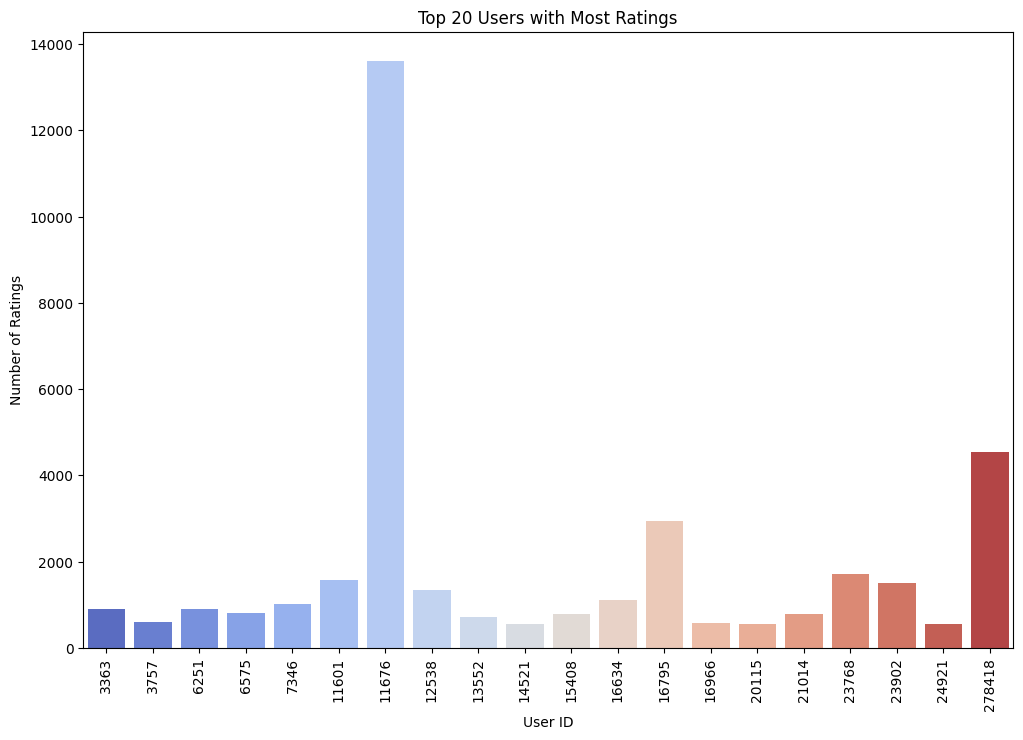

In [28]:
# Count the number of ratings per user
user_counts = ratings['User-ID'].value_counts()

# Plot the top 20 users with the most ratings
top_users = user_counts.head(20)

plt.figure(figsize=(12,8))
sns.barplot(x=top_users.index, y=top_users.values, palette="coolwarm")
plt.title("Top 20 Users with Most Ratings")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=90)
plt.show()


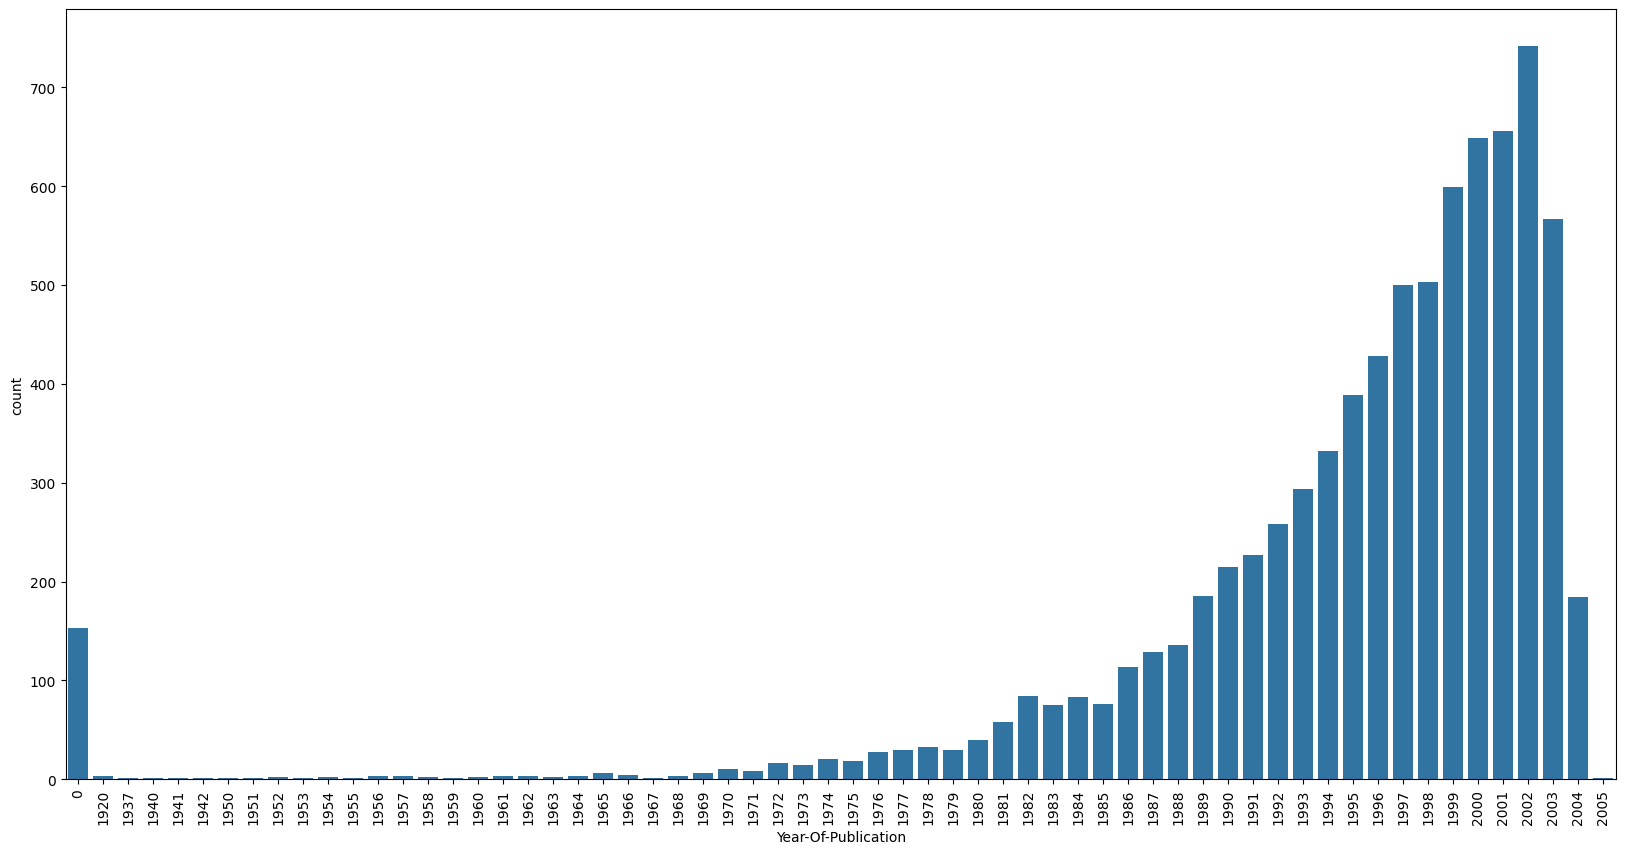

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x=books['Year-Of-Publication'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Location'>

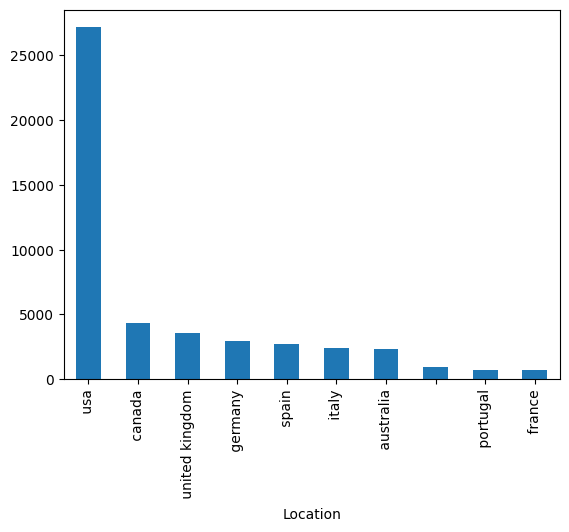

In [30]:
users['Location'] = users['Location'].apply(lambda x: str(x).split(',')[-1] if isinstance(x, str) else '')
users['Location'].value_counts().head(10).plot(kind='bar')


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

#preprocessing step
#drop dups based on isbn
books.drop_duplicates(subset='ISBN', inplace=True)

# merge ratings with books dataset to get book details
book_ratings = ratings.merge(books, on='ISBN')

# filter books with at least 50 ratings for better recommendations
popular_books = book_ratings['Book-Title'].value_counts() > 50
popular_books = popular_books[popular_books].index
book_ratings = book_ratings[book_ratings['Book-Title'].isin(popular_books)]

# reset the index of the book_ratings df after filtering the dataset to include only popular books
book_ratings.reset_index(drop=True, inplace=True)

# combines metadata features into one content field

#i used content based filtering instead of collaborative bc i had a lot of metadata for each book, such as the title, author, publisher, and year of publication.
#
books['content'] = books['Book-Title'].fillna('') + ' ' + \
                   books['Book-Author'].fillna('') + ' ' + \
                   books['Publisher'].fillna('') + ' ' + \
                   books['Year-Of-Publication'].astype(str)

#content based filtering step
# create a tf-idf matrix for combined metadata
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(books['content'])

# compute cosine similarity between books based on combined content
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# reccomender function
def recommend_books(book_title, n=5):
    """reccomend books based on combined content features."""
    if book_title not in books['Book-Title'].values:
        print(f"Book '{book_title}' not found in the dataset.")
        return

    # get the index of the selected book
    idx = books[books['Book-Title'] == book_title].index[0]

    # calc similarity scores & print
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:n+1]

    print(f"Books you may like: '{book_title}' ")
    for i, score in sim_scores:
        print(f"{books.iloc[i]['Book-Title']} by {books.iloc[i]['Book-Author']} (Similarity: {score:.2f})")

# testing
book_title_input = input("Enter a book title: ")
recommend_books(book_title_input)

Enter a book title: To the Lighthouse
Books you may like: 'To the Lighthouse' 
To the Lighthouse (Penguin Popular Classics) by Virginia Woolf (Similarity: 0.62)
Mrs Dalloway by Virginia Woolf (Similarity: 0.52)
Virginia Woolf: A Biography by Quentin Bell (Similarity: 0.47)
A Room of One's Own by Virginia Woolf (Similarity: 0.43)
Moments of Being: Second Edition by Virginia Woolf (Similarity: 0.37)
